In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import os
import re

### The dataset spaghetti.txt contains the weight (in oz) of 20 spaghetti boxes of a famous pasta brand.

In [2]:
os.getcwd() # check current location

'/Users/jimin/Desktop/데스크탑 - 이지민의 MacBook\xa0Air/지민/ewha/2023-2/Regression/week2'

txt 파일의 구조가 ""안에 인덱스가 들어있고, 공백도 없이 값이 쭉 이어지는 형태라 pd.readtable()가 제대로 값을 불러오지 못한다. 따라서 정규표현식을 통해 이 문제점을 해결한다. 

In [3]:
with open('spaghetti.txt', 'r') as file:
    lines = file.readlines() # ['"spaghetti"\n','"1"15.3133500408265\n',
    
indices = []
elements = []

for line in lines:
    match = re.match(r'"(\d+)"([\d.]+)', line)
    if match:
        index = int(match.group(1))
        element = float(match.group(2))
        indices.append(index)
        elements.append(element)

In [4]:
data_1 = pd.DataFrame({'spaghetti' : elements})
data_1.head(5)

,spaghetti
0,15.313350
1,15.283792
2,15.905021
3,16.751270
4,15.893500


### A consumers' association would like to sue the company, affirming that the mean box weight is lower than the nominal one (16 oz). To be sure about their statement, they ask you to perform a suitable test with level 1%.

#### First compute the sample mean and the standard deviation of the box weight.

In [5]:
data_1['spaghetti'].describe()

count    20.000000
mean     15.489846
std       0.882175
min      14.041929
25%      14.867575
50%      15.458736
75%      16.143848
max      16.950836
Name: spaghetti, dtype: float64

In [7]:
mean_spa = data_1['spaghetti'].mean()
std_spa = data_1['spaghetti'].std()

print(f'mean : {mean_spa}')
print(f'std : {std_spa}')

mean : 15.489845631427375
std : 0.8821747119189167


#### Perform the test for the consumers' association.

##### What is your null hypothesis H0?

H0 : M = 16

##### What is your alternative hypothesis H1?

H1 : M < 16

##### What distribution can you assume for the test statistic (type of distribution and parameters), and why?

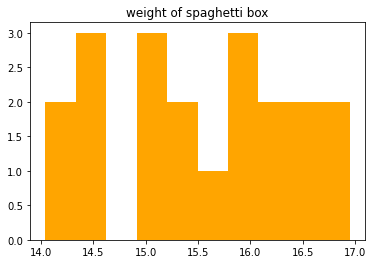

In [8]:
plt.hist(data_1['spaghetti'], color='orange')
plt.title('weight of spaghetti box')
plt.show()

##### Compute the test statistic.

In [9]:
def cal_TestStatistic(mean_hat, mu, s, n):
    return ((mean_hat - float(mu)) / (s / np.sqrt(float(n))))

t = cal_TestStatistic(mean_spa, 16, std_spa, data_1.count())
t

-2.58619938144797

##### Compute the test p-value.

In [10]:
tstat, pval = stats.ttest_1samp(data_1['spaghetti'], popmean=16, alternative='less')
pval

0.009055174905033336

##### Do you reject the null hypothesis, at significance level 1%? 
Yes, since p_value is <1%

##### Compute the 99% two-sided confidence interval for the mean of the box weight.

In [11]:
std_sample = stats.sem(data_1['spaghetti']) # 중요, 표준오차를 계산해준다. 
stats.t.interval(alpha=0.99, df=data_1['spaghetti'].shape[0]-1, loc=mean_spa, scale=std_sample) # 신뢰구간을 구하는 코드

(14.925496920283585, 16.054194342571165)

### Consider again the dataset record.txt that you used for Lab 1. This dataset contains running records obtained from athletes from different countries in various types of athletics events (sprints and middle-distance).

We have data about 55 countries (observations) and 6 records (variables): 100 meters, 200 meters, 400 meters, 800 meters, 1500 meters and 3000 meters.

#### Load the dataset record.txt in R, using the function read.table (remember to set sep=' ')

In [12]:
data_2 = pd.read_table('record.txt', sep='\s+')
data_2.head(10)

,m100,m200,m400,m800,m1500,m3000
argentin,11.61,22.94,54.50,129.0,265.8,587.4
australi,11.20,22.35,51.08,118.8,247.8,544.8
austria,11.43,23.09,50.62,119.4,253.2,560.4
belgium,11.41,23.04,52.00,120.0,248.4,532.8
bermuda,11.46,23.05,53.30,129.6,274.8,588.6
brazil,11.31,23.17,52.80,126.0,269.4,586.2
burma,12.14,24.47,55.00,130.8,267.0,570.6
canada,11.00,22.25,50.06,120.0,243.6,528.6
chile,12.00,24.52,54.90,123.0,253.8,562.2
china,11.95,24.41,54.97,124.8,259.8,558.6


#### Draw a scatterplot and compute the correlation for all pairs of variables in the dataset. Interpret the results you obtained: what can you observe about the relationship among the variables?

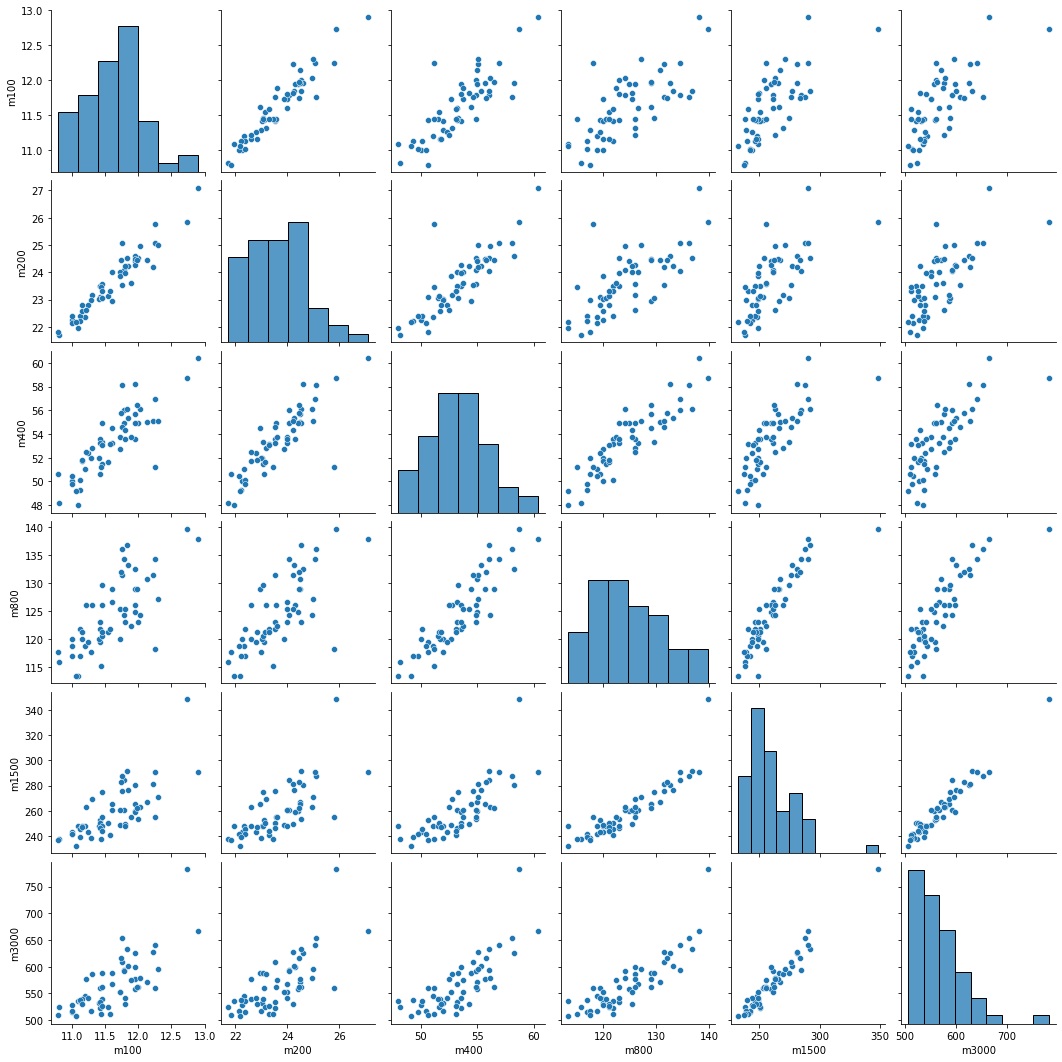

In [11]:
sns.pairplot(data_2)
plt.show()

In [15]:
corr_df = data_2.corr()
corr_df

,m100,m200,m400,m800,m1500,m3000
m100,1.000000,0.952791,0.834692,0.727689,0.728371,0.741699
m200,0.952791,1.000000,0.856962,0.724060,0.698364,0.709871
m400,0.834692,0.856962,1.000000,0.898405,0.787842,0.777637
m800,0.727689,0.724060,0.898405,1.000000,0.901614,0.863565
m1500,0.728371,0.698364,0.787842,0.901614,1.000000,0.969169
m3000,0.741699,0.709871,0.777637,0.863565,0.969169,1.000000


### Consider the variables m100 and m400.

#### Using the equations(not lm function or matrix equation in r), compute the least square estimators for the coefficients of a single linear regression model, with response m100 and predictor m400. How do you interpret the slope or the regression line?

In [12]:
x = np.array(data_2['m100']).reshape(-1,1) # x.shape = (55,1)
y = np.array(data_2['m400']).reshape(-1,1) # y.shape = (55,1)

In [13]:
b1 = np.sum((y- np.mean(y))*(x-np.mean(x))) / np.sum((x-np.mean(x))**2)
b0 = np.mean(y) - np.mean(x)*b1

print('b0 : ',b0)
print('b1 : ',b1)

b0 :  -4.0326275398140865
b1 :  4.943686449077924


The slope of regression line is 4.94. This slope line means that an increase of 1 sec in the m100 record corresponds to an increase of 4.94 sec in th

#### Produce a scatter plot for m100 vs m400 with the fitted regression line superimposed.

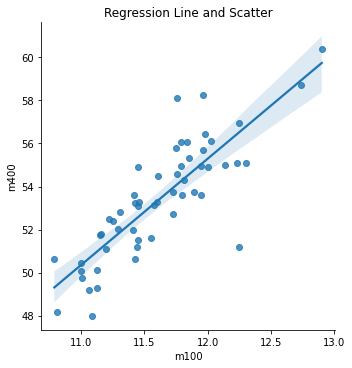

In [14]:
sns.lmplot(data=data_2, x='m100', y='m400')
plt.title("Regression Line and Scatter")
plt.show()

#### Re-compute the least square estimators of beta0 and beta1 using the matrix equation.

In [15]:
def cal_beta(x,y):
    '''
    b matrix를 구하는 함수
    위부터 b0, b1, ... 
    '''
    mat_x = np.hstack((np.ones(x.shape), x))
    return np.linalg.inv(mat_x.T@mat_x)@mat_x.T@y 

cal_beta(x,y) # 위부터 b0, b1

array([[-4.03262754],
       [ 4.94368645]])

#### Re-compute the least square estimators of beta0 and beta1 using the R function lm, and visualize the summary of the regression.

In [16]:
# from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)
cof = lr.coef_
intercept = lr.intercept_

beta = np.vstack((intercept, cof)) # intercept : 절편, 다시 말해 b0, cof : b1 부터 베타의 값
beta

array([[-4.03262754],
       [ 4.94368645]])

In [18]:
# summary를 출력해주는 클래스 만들기 (추가과제)
results = sm.OLS(y, x).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          7.142e+04
Date:                Thu, 21 Sep 2023   Prob (F-statistic):                    5.58e-86
Time:                        02:05:13   Log-Likelihood:                         -99.223
No. Observations:                  55   AIC:                                      200.4
Df Residuals:                      54   BIC:                                      202.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Which are n and p for the considered regression model?

n : total num of observations
p : total num of parameters

#### Compute the fitted values and the residuals, using the estimated regression line.

In [21]:
# the fitted values
fitted_values = lr.predict(x)
fitted_values[:10]

array([[53.36357213],
       [51.33666069],
       [52.47370857],
       [52.37483484],
       [52.62201917],
       [51.8804662 ],
       [55.98372595],
       [50.3479234 ],
       [55.29160985],
       [55.04442553]])

In [23]:
residuals = y - fitted_values
residuals[:10]

array([[ 1.13642787],
       [-0.25666069],
       [-1.85370857],
       [-0.37483484],
       [ 0.67798083],
       [ 0.9195338 ],
       [-0.98372595],
       [-0.2879234 ],
       [-0.39160985],
       [-0.07442553]])

#### Consider the 25th and 75th percentiles of the variable m100 on the dataset.Use the estimated regression line to estimate the fitted value of the variable m100 at each of these two percentiles.

percentile vs quantitle

In [57]:
m100_25 = np.quantile(a=x, q=0.25)
m100_75 = np.quantile(a=x, q=0.75)

percent_vec = np.vstack((m100_25, m100_75))
percent_vec

array([[11.27],
       [11.92]])

In [58]:
lr.predict(percent_vec)

array([[51.68271874],
       [54.89611493]])